# Load Data

In [2]:
import pandas as pd

In [3]:
def load_data():
    """Load the drug names, side effects, and disease data"""
    side_effects_url = "http://sideeffects.embl.de/media/download/meddra_all_se.tsv.gz"
    drug_names_url = "http://sideeffects.embl.de/media/download/drug_names.tsv"
    disease_data_url = "https://www.kaggle.com/api/v1/datasets/download/manncodes/drug-prescription-to-disease-dataset?dataset_version_number=1"

    side_effects_df = pd.read_csv(side_effects_url, sep='\t', compression='gzip',
                                  names=['drug_id', 'side_effect_id', 'side_effect_name',
                                         'frequency', 'placebo_frequency', 'meddra_type'])
    drug_names_df = pd.read_csv(drug_names_url, sep='\t', names=['drug_id', 'drug_name'])
    disease_data_df = pd.read_csv(disease_data_url, sep=',', compression='zip')

    return side_effects_df, drug_names_df, disease_data_df

In [4]:
side_effects_df, drug_names_df, disease_data_df = load_data()

In [6]:
# Save each dataframe to a separate CSV file
side_effects_df.to_csv('../data/side_effects.csv', index=False)
drug_names_df.to_csv('../data/drug_names.csv', index=False)
disease_data_df.to_csv('../data/disease_data.csv', index=False)

In [7]:
len(disease_data_df['drug'].unique())

1615

# Data EDA

Side Effects DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309849 entries, 0 to 309848
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   drug_id            309849 non-null  object
 1   side_effect_id     309849 non-null  object
 2   side_effect_name   309849 non-null  object
 3   frequency          308948 non-null  object
 4   placebo_frequency  308948 non-null  object
 5   meddra_type        309849 non-null  object
dtypes: object(6)
memory usage: 14.2+ MB
None

Side Effects DataFrame Description:
             drug_id side_effect_id side_effect_name frequency  \
count         309849         309849           309849    308948   
unique          1430           1556             5868         2   
top     CID100002771   CID000060795         C0015230        PT   
freq            2185           1610             3459    163206   

       placebo_frequency meddra_type  
count             308948

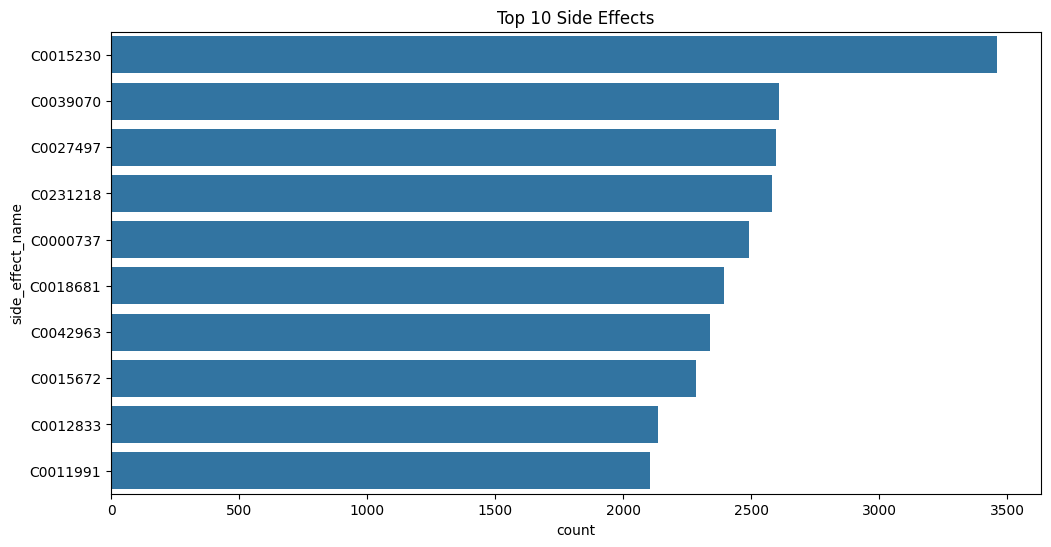

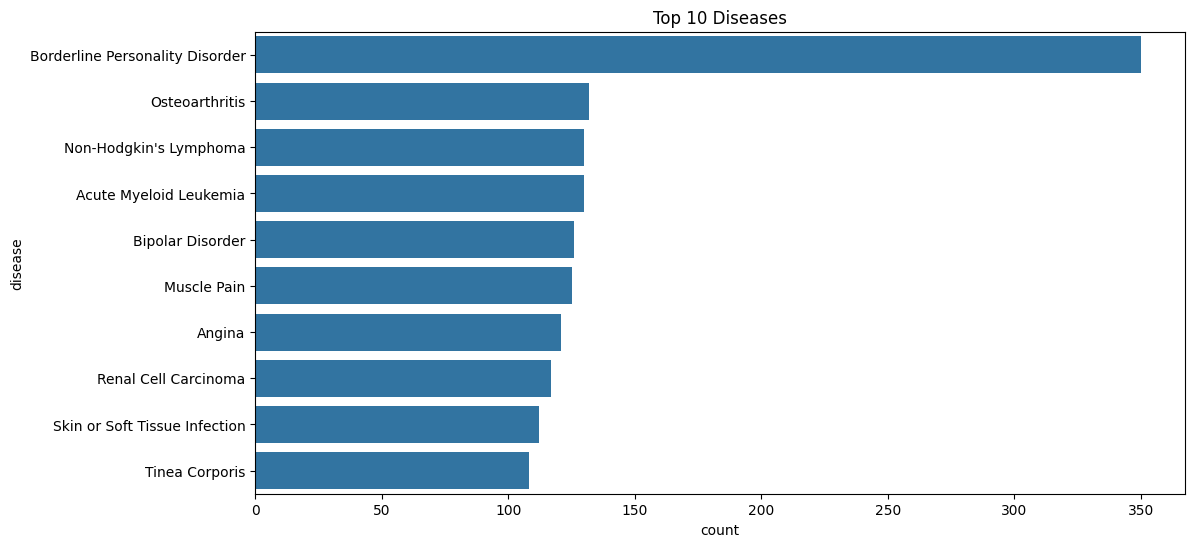

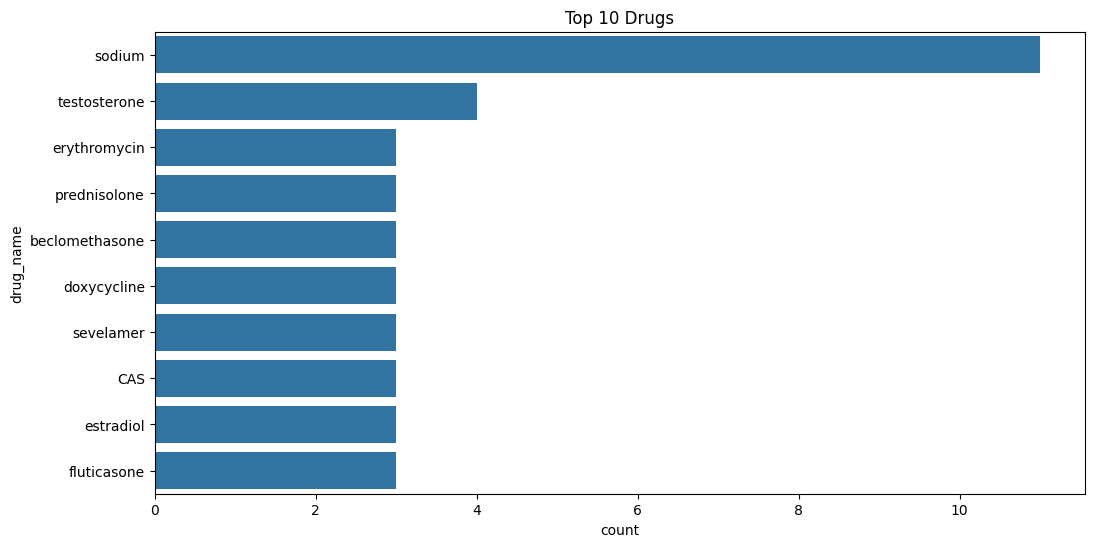

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Display basic information and statistics for each dataset
print("Side Effects DataFrame Info:")
print(side_effects_df.info())
print("\nSide Effects DataFrame Description:")
print(side_effects_df.describe(include='all'))

print("\nDrug Names DataFrame Info:")
print(drug_names_df.info())
print("\nDrug Names DataFrame Description:")
print(drug_names_df.describe(include='all'))

print("\nDisease Data DataFrame Info:")
print(disease_data_df.info())
print("\nDisease Data DataFrame Description:")
print(disease_data_df.describe(include='all'))

# Check for missing values
print("\nMissing values in Side Effects DataFrame:")
print(side_effects_df.isnull().sum())

print("\nMissing values in Drug Names DataFrame:")
print(drug_names_df.isnull().sum())

print("\nMissing values in Disease Data DataFrame:")
print(disease_data_df.isnull().sum())

# Visualize the distribution of some key columns
plt.figure(figsize=(12, 6))
sns.countplot(y='side_effect_name', data=side_effects_df, order=side_effects_df['side_effect_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Side Effects')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='disease', data=disease_data_df, order=disease_data_df['disease'].value_counts().iloc[:10].index)
plt.title('Top 10 Diseases')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='drug_name', data=drug_names_df, order=drug_names_df['drug_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Drugs')
plt.show()

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4432523 entries, 0 to 4432522
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   drug_id            object
 1   side_effect_id     object
 2   side_effect_name   object
 3   frequency          object
 4   placebo_frequency  object
 5   meddra_type        object
 6   drug_name          object
 7   Unnamed: 0         int64 
 8   disease            object
 9   drug               object
dtypes: int64(1), object(9)
memory usage: 338.2+ MB
None

Merged DataFrame Description:
             drug_id side_effect_id side_effect_name frequency  \
count        4432523        4432523          4432523   4419489   
unique           787            870             5171         2   
top     CID100002771   CID000002764         C0231218        PT   
freq          150765         104830            35525   2332212   
mean             NaN            NaN              NaN       NaN   
std     

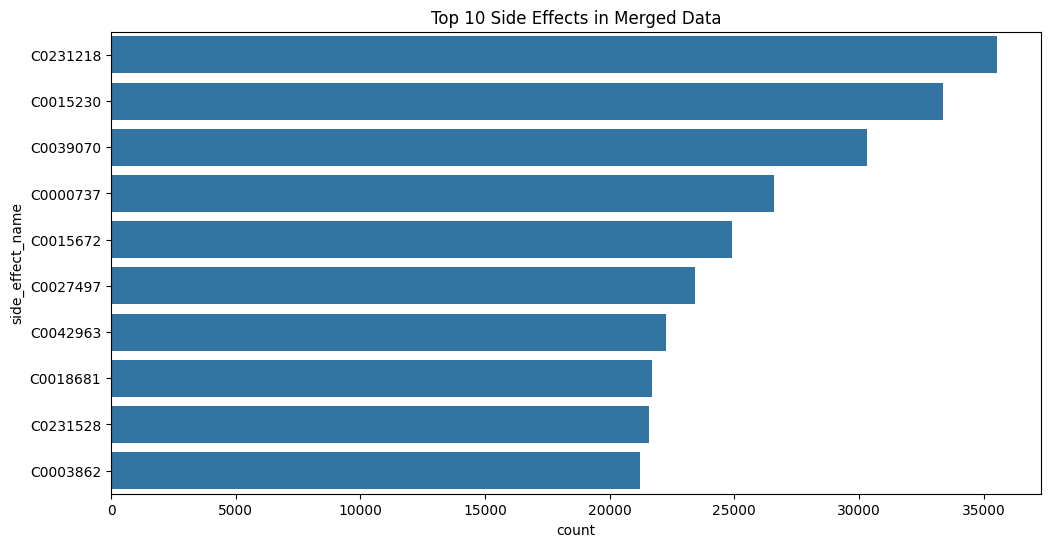

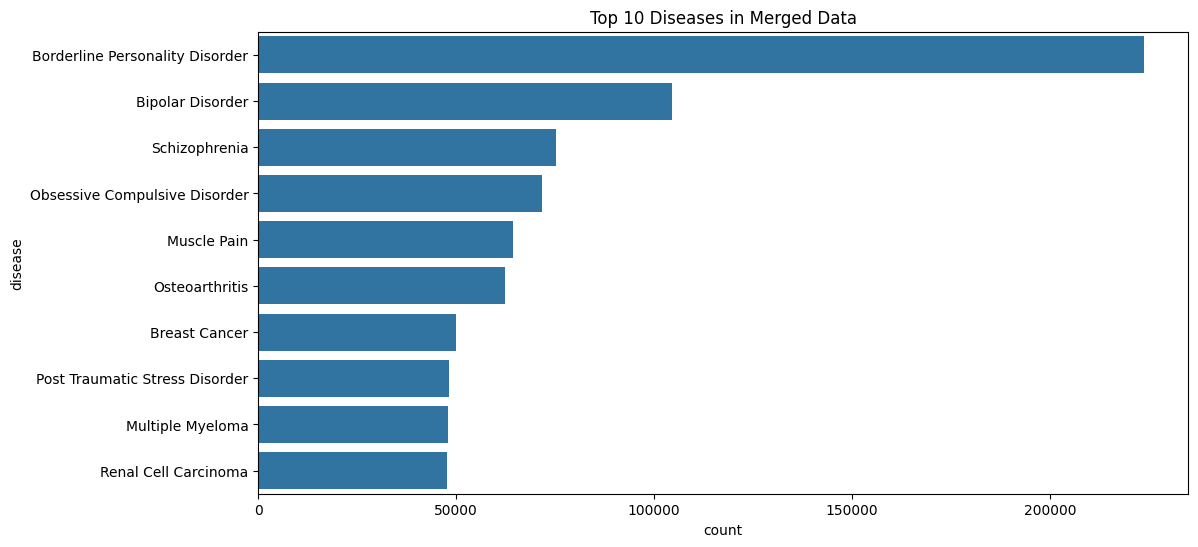

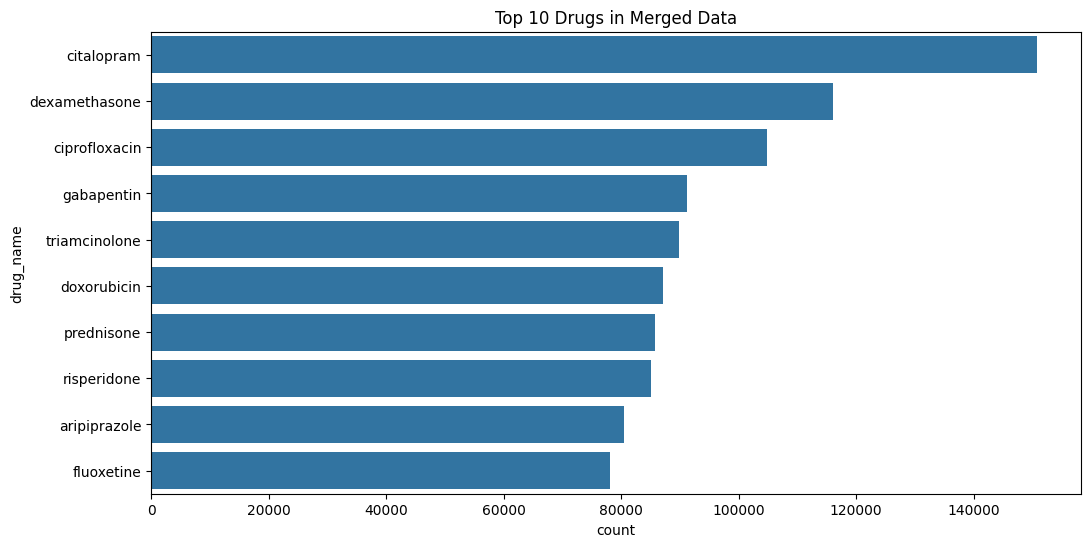

In [20]:
# Merge the datasets
merged_df = side_effects_df.merge(drug_names_df, on='drug_id').merge(disease_data_df, left_on='drug_name', right_on='drug')

# Display basic information and statistics for the merged dataset
print("Merged DataFrame Info:")
print(merged_df.info())
print("\nMerged DataFrame Description:")
print(merged_df.describe(include='all'))

# Check for missing values
print("\nMissing values in Merged DataFrame:")
print(merged_df.isnull().sum())

# Visualize the distribution of some key columns
plt.figure(figsize=(12, 6))
sns.countplot(y='side_effect_name', data=merged_df, order=merged_df['side_effect_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Side Effects in Merged Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='disease', data=merged_df, order=merged_df['disease'].value_counts().iloc[:10].index)
plt.title('Top 10 Diseases in Merged Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='drug_name', data=merged_df, order=merged_df['drug_name'].value_counts().iloc[:10].index)
plt.title('Top 10 Drugs in Merged Data')
plt.show()

In [24]:
merged_df.describe(include='all')

,drug_id,side_effect_id,side_effect_name,frequency,placebo_frequency,meddra_type,drug_name,Unnamed: 0,disease,drug
count,4432523,4432523,4432523,4419489,4419489,4432523,4432523,4.432523e+06,4432523,4432523
unique,787,870,5171,2,5359,5405,739,NaN,1127,739
top,CID100002771,CID000002764,C0231218,PT,C0012833,Dizziness,citalopram,NaN,Borderline Personality Disorder,citalopram
freq,150765,104830,35525,2332212,28470,28470,150765,NaN,223678,150765
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.269923e+03,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.253315e+03,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.466000e+03,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.279000e+03,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.096700e+04,NaN,NaN


In [25]:
disease_data_df.describe(include='all')

,Unnamed: 0,disease,drug
count,14683.000000,14683,14683
unique,NaN,1508,1615
top,NaN,Borderline Personality Disorder,prednisone
freq,NaN,350,187
mean,7341.000000,NaN,NaN
std,4238.761336,NaN,NaN
min,0.000000,NaN,NaN
25%,3670.500000,NaN,NaN
50%,7341.000000,NaN,NaN
75%,11011.500000,NaN,NaN


In [26]:
# Distinct drugs before merge
distinct_drugs_before_merge = drug_names_df['drug_name'].nunique()
print(f"Distinct drugs before merge: {distinct_drugs_before_merge}")

# Distinct diseases before merge
distinct_diseases_before_merge = disease_data_df['disease'].nunique()
print(f"Distinct diseases before merge: {distinct_diseases_before_merge}")

# Distinct drugs after merge
distinct_drugs_after_merge = merged_df['drug_name'].nunique()
print(f"Distinct drugs after merge: {distinct_drugs_after_merge}")

# Distinct diseases after merge
distinct_diseases_after_merge = merged_df['disease'].nunique()
print(f"Distinct diseases after merge: {distinct_diseases_after_merge}")

Distinct drugs before merge: 1347
Distinct diseases before merge: 1508
Distinct drugs after merge: 739
Distinct diseases after merge: 1127


# Multiclassification Model Flow
1. Load all three datassts
   1. Side Effects Data
   2. Drug Names Data
   3. Disease Data
2. Preprocess Data
   1. Merge Side Effects with Drug Names
   2. Pivot it Drugs X SIDE Effects
   3. Fill it up with Zeros & EDA
3. Train Model
   1. Label Encoder EncodeY
   2. Split Dataset 80 - 20
   3. XgB - Test ( Test all Models) - (tell which model performs betters - Other Boosting techniques)
   4. COnvert y test and train to int
   5. Train
   6. Accuracy and Classification Report
4. Save Results
   1. .pkl file with model and label encoder
   2. .json with model performance metrics
   3.  Show Detailed Metrics

# Visualization Flow

1. Load Model and Results
2. Load the Disease Data with Side Effects and Drug Data
3. Combine all 3 into 1 
4. Application Starts
   1. Select a Disease
   2. Select Drug currently taking to handle that disease
   3. Select secodn Disease
   4. Predict 2nd Drug  by predict all combinations for all drugs
   5. Filter out first 2 and shwo only those
5. Download Results